<a href="https://colab.research.google.com/github/PriyankaBhatia-12/Repo/blob/main/Random_Forest_Model_in_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


#Load the Dataset

In [107]:
# Load the dataset
file_path = "/content/airlines_delay.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display first few rows to understand the structure
print(df.head())

print(df.shape)

   Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0  2313.0  1296.0   141.0      DL         ATL       HOU          1      0
1  6948.0   360.0   146.0      OO         COS       ORD          4      0
2  1247.0  1170.0   143.0      B6         BOS       CLT          3      0
3    31.0  1410.0   344.0      US         OGG       PHX          6      0
4   563.0   692.0    98.0      FL         BMI       ATL          4      0
(539382, 8)


# Data Preprocessing

In [100]:
# Encode categorical features
label_encoders = {}
for col in ["Airline", "AirportFrom", "AirportTo"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories into numbers
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=[ "Flight", "Class"])  # Remove ID & Flight (not predictive)
y = df["Class"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (431505, 6), Testing data: (107877, 6)


#Train the Random Forest Model

In [104]:
# Initialize the model with 100 decision trees
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
# Make predictions
y_pred = model.predict(X_test)


#Model Evaluation

Model Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66     59714
           1       0.57      0.55      0.56     48163

    accuracy                           0.62    107877
   macro avg       0.61      0.61      0.61    107877
weighted avg       0.62      0.62      0.62    107877



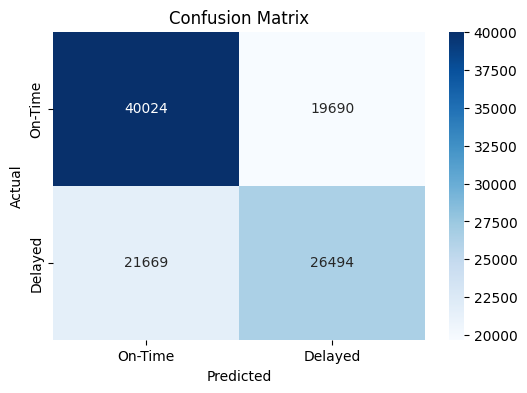

In [106]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
